# Excercise 2 - Regularized Logistic regression

In [35]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 6,5

In [36]:
# Load data from file
data = pd.read_csv('ex2data2.txt', header=None, names=['Test 1', 'Test 2', 'Accepted'])
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Visualizing the data

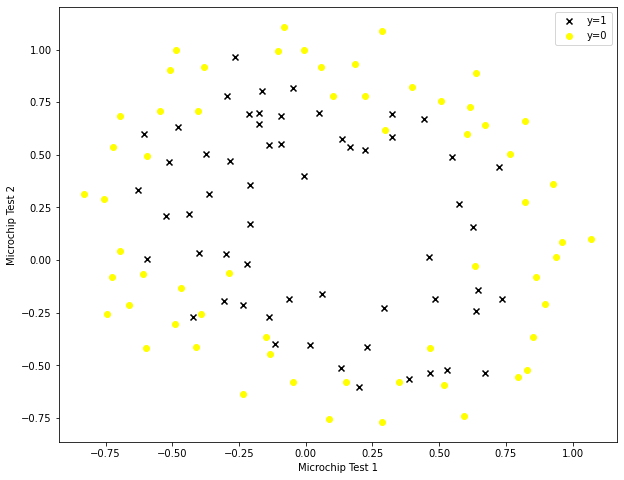

In [37]:
# Find all data points with positive and negative accepted results respectively
pos = data[data['Accepted'].isin([1])]
neg = data[data['Accepted'].isin([0])]

# Plot data
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(pos['Test 1'], pos['Test 2'], marker='x', color='black', label='y=1')
ax.scatter(neg['Test 1'], neg['Test 2'], marker='o', color='yellow', label='y=0')
ax.set_xlabel('Microchip Test 1')
ax.set_ylabel('Microchip Test 2')
ax.legend()

Feature mapping

In [42]:
def map_feature(X1, X2):
    degree = 6
    out = np.ones((X1.size, 1))

    # NOTE: +1 because of differences in Python and Octave
    for i in range(1, degree+1, 1):
        for j in range(0, i+1, 1):
            tmp = np.multiply((X1**(i-j)),  (X2**j))
            tmp = tmp.reshape((X1.size, 1))
            out = np.hstack([out, tmp])

    return out

X1 = data['Test 1'].values
X2 = data['Test 2'].values
out = map_feature(X1, X2)

array([[ 1.00000000e+00,  5.12670000e-02,  6.99560000e-01,
         2.62830529e-03,  3.58643425e-02],
       [ 1.00000000e+00, -9.27420000e-02,  6.84940000e-01,
         8.60107856e-03, -6.35227055e-02],
       [ 1.00000000e+00, -2.13710000e-01,  6.92250000e-01,
         4.56719641e-02, -1.47940748e-01],
       [ 1.00000000e+00, -3.75000000e-01,  5.02190000e-01,
         1.40625000e-01, -1.88321250e-01],
       [ 1.00000000e+00, -5.13250000e-01,  4.65640000e-01,
         2.63425562e-01, -2.38989730e-01],
       [ 1.00000000e+00, -5.24770000e-01,  2.09800000e-01,
         2.75383553e-01, -1.10096746e-01],
       [ 1.00000000e+00, -3.98040000e-01,  3.43570000e-02,
         1.58435842e-01, -1.36754603e-02],
       [ 1.00000000e+00, -3.05880000e-01, -1.92250000e-01,
         9.35625744e-02,  5.88054300e-02],
       [ 1.00000000e+00,  1.67050000e-02, -4.04240000e-01,
         2.79057025e-04, -6.75282920e-03],
       [ 1.00000000e+00,  1.31910000e-01, -5.13890000e-01,
         1.74002481e-02